In [2]:
import numpy as np
import matplotlib.pyplot as plot

## Scatterplot of rows of two orthogonal vectors (normally distributed around 0, with variance 100)

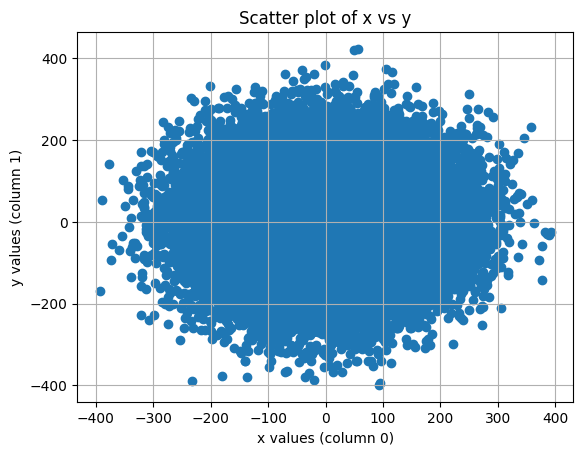

In [14]:
n = 50000
x,z = (np.random.randn(2,n)) * 100
#project z onto the space orthogonal to x to get y
y = z - np.dot(z,x)/np.dot(x,x)*x #y orthogonal to x 
V = np.column_stack((x,y))
plot.scatter(V[:, 0], V[:,1])
plot.xlabel('x values (column 0)')
plot.ylabel('y values (column 1)')
plot.title('Scatter plot of x vs y')
plot.grid(True)
plot.show()




## Scatterplot of rows of two orthogonal vectors (uniformly distributed between -100,100)

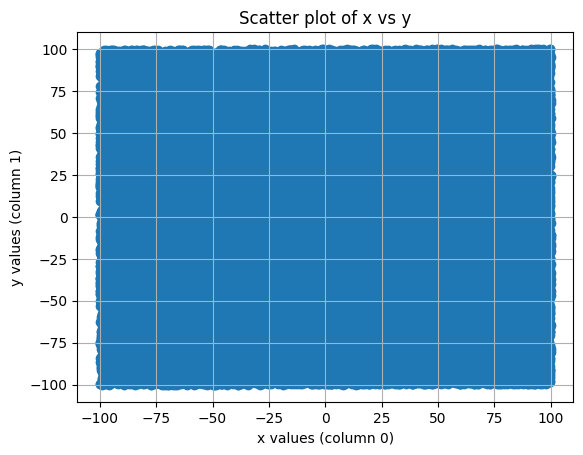

In [15]:
n = 50000
x,z = (np.random.rand(2,n)-.5) * 200
#project z onto the space orthogonal to x to get y
y = z - np.dot(z,x)/np.dot(x,x)*x #y orthogonal to x 
V = np.column_stack((x,y))
plot.scatter(V[:, 0], V[:,1])
plot.xlabel('x values (column 0)')
plot.ylabel('y values (column 1)')
plot.title('Scatter plot of x vs y')
plot.grid(True)
plot.show()

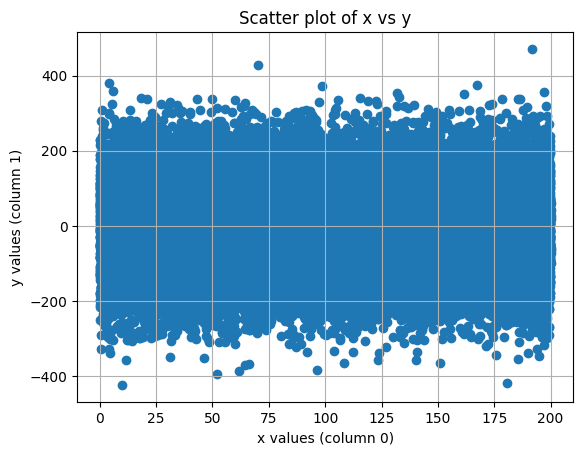

In [16]:
n = 50000
x = (np.random.rand(n)) * 200
z = (np.random.randn(n)) * 100
#z = (np.abs(z) + np.sign(x)) / 50
#project z onto the space orthogonal to x to get y
y = z - np.dot(z,x)/np.dot(x,x)*x #y orthogonal to x 
V = np.column_stack((x,y))
plot.scatter(V[:, 0], V[:,1])
plot.xlabel('x values (column 0)')
plot.ylabel('y values (column 1)')
plot.title('Scatter plot of x vs y')
plot.grid(True)
plot.show()

## Plotting the rejection rate of hypothesis testing zero covariance between two randomly generated feature vectors & two slightly correlated vectors - depending on n


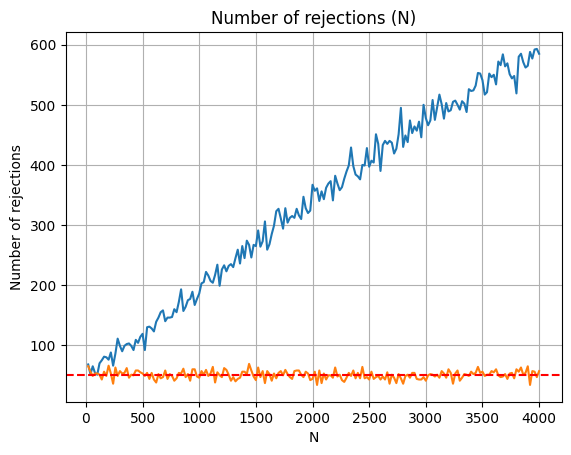

In [30]:
n = 4000
step_size = 20
rejected = np.empty((3,0))
for i in range(step_size, n+1, step_size):
    r_y = 0
    r_z = 0
    for j in range(1000):
        x,z = np.random.rand(2,i)
        noise = np.random.randn(i)
        corr = 0.01
        x_centered = x - np.mean(x)
        z_centered = z - np.mean(z)
        s_x2 = np.var(x_centered, ddof=1)
        s_z2 = np.var(z_centered,ddof=1)

        y = corr * (x_centered)/s_x2 + np.sqrt(1 - corr ** 2)*noise
        y_centered = y - np.mean(y)
        s_y2 = np.var(y_centered, ddof=1)
        
        cov_y = 1 / (i - 1) * np.dot(x_centered, y_centered)
        cov_z = 1 / (i - 1) * np.dot(x_centered, z_centered)
        
        z_y = cov_y * np.sqrt(i) / np.sqrt(s_x2 * s_y2)
        z_z = cov_z * np.sqrt(i) / np.sqrt(s_x2 * s_z2)
        if np.abs(z_y) > 1.96:
            r_y += 1
        if np.abs(z_z) > 1.96:
            r_z += 1
    rejected = np.hstack((rejected, [[i],[r_y],[r_z]]))
plot.plot(rejected[0,:],rejected[1,:])
plot.plot(rejected[0,:],rejected[2,:])
plot.axhline(y=50, color='r', linestyle='--', label='Expected 50 rejections per 1000 Tests if no correlation')
plot.xlabel("N")
plot.ylabel("Number of rejections")
plot.title("Number of rejections (N)")
plot.grid(True)
plot.show()

        